## Data Science Final Project


## Data loading and examination

Loading the dataset and examine its contents to gain insight into its structure 

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('new_york_listings_2024.csv')

# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [3]:
# Show the first five rows of the DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


## Data cleaning

Removing duplicate rows and rows with missing values and irrelevant columns.

In [4]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Drop the irrelevant columns
df.drop(['id', 'name', 'host_id', 'host_name', 'minimum_nights', 'number_of_reviews',
         'last_review', 'reviews_per_month', 'calculated_host_listings_count',
         'availability_365', 'number_of_reviews_ltm', 'license', 'bedrooms', 'beds', 'baths',
         'room_type'],
        axis=1,
        inplace=True)

# Display the updated summary of the c
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  20758 non-null  object 
 1   neighbourhood        20758 non-null  object 
 2   latitude             20758 non-null  float64
 3   longitude            20758 non-null  float64
 4   price                20758 non-null  float64
 5   rating               20758 non-null  object 
dtypes: float64(3), object(3)
memory usage: 973.2+ KB


In [5]:
# Show the first five rows of the DataFrame
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,price,rating
0,Brooklyn,Clinton Hill,40.683710,-73.964610,55.0,5.0
1,Manhattan,Hell's Kitchen,40.766610,-73.988100,144.0,4.67
2,Manhattan,Chelsea,40.750764,-73.994605,187.0,4.17
3,Manhattan,Washington Heights,40.835600,-73.942500,120.0,4.64
4,Manhattan,Murray Hill,40.751120,-73.978600,85.0,4.91


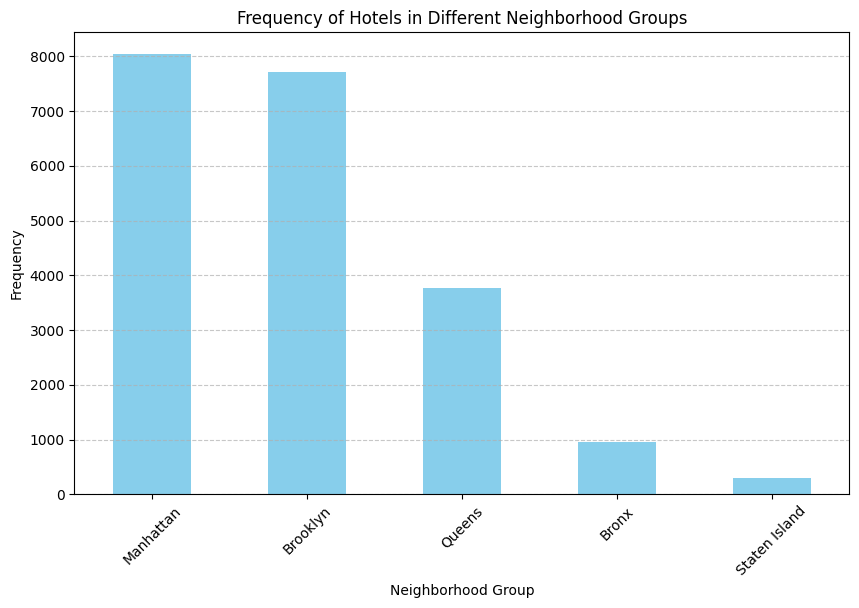

In [6]:
plt.figure(figsize=(10, 6))
neighbourhood_group_counts = df['neighbourhood_group'].value_counts()

neighbourhood_group_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Hotels in Different Neighborhood Groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
filtered_df = df[(df['price'] >= 0) & (df['price'] <= 1000)]

total_airbnbs = df.shape[0]

# Calculate the number of Airbnbs in the $0 to $1000 price range
num_airbnbs_in_range = filtered_df.shape[0]

# Calculate the percentage
percentage_in_range = (num_airbnbs_in_range / total_airbnbs) * 100

print("Percentage of Airbnbs in the $0 to $1000 price range:", percentage_in_range, "%")

Percentage of Airbnbs in the $0 to $500 price range: 99.19067347528664 %


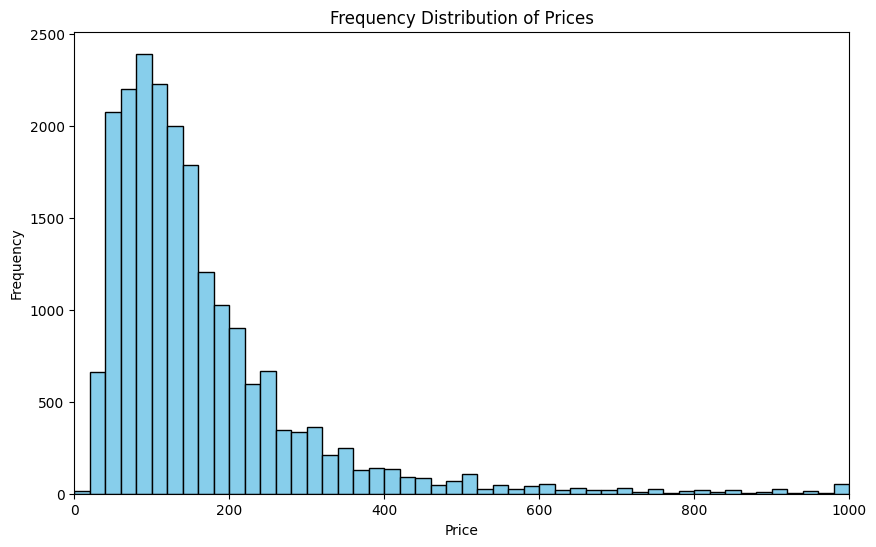

In [15]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram
ax.hist(df['price'], bins=50, range=(0, 1000), color='skyblue', edgecolor='black')

# Add labels and title
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.set_title('Frequency Distribution of Prices')

# Set the x-axis limit
ax.set_xlim(0, 1000)

# Show the plot
plt.show()

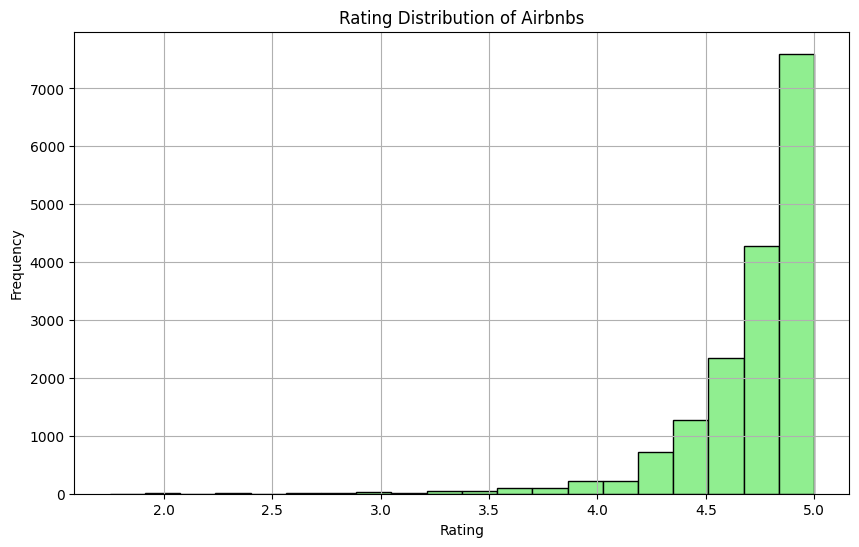

In [16]:
# Filter out unexpected values from the 'rating' column
filtered_df = df[~df['rating'].isin(['No rating', 'New '])]

# Convert rating column to float (assuming it's stored as strings)
filtered_df.loc[:, 'rating'] = filtered_df['rating'].astype(float)

# Rating Histogram with Custom Bins Range
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['rating'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Rating Distribution of Airbnbs')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

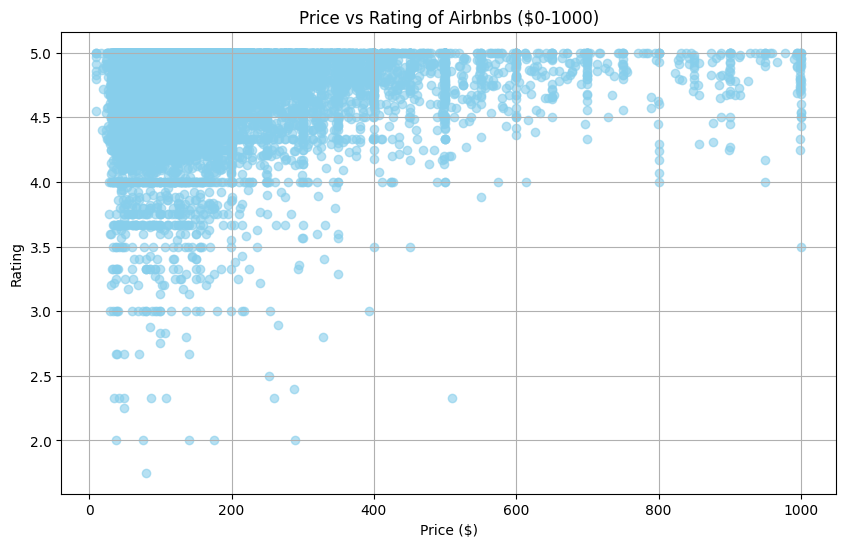

In [11]:

# Filter out price values not in the range 0 - 1000 and unexpected rating values
filtered_df = df[(df['price'] >= 0) & (df['price'] <= 1000) & (~df['rating'].isin(['No rating', 'New ']))]

# Convert rating column to float (assuming it's stored as strings)
filtered_df.loc[:, 'rating'] = filtered_df['rating'].astype(float)

# Scatter plot of Price vs Rating
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['price'], filtered_df['rating'], color='skyblue', alpha=0.6)
plt.title('Price vs Rating of Airbnbs ($0-1000)')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


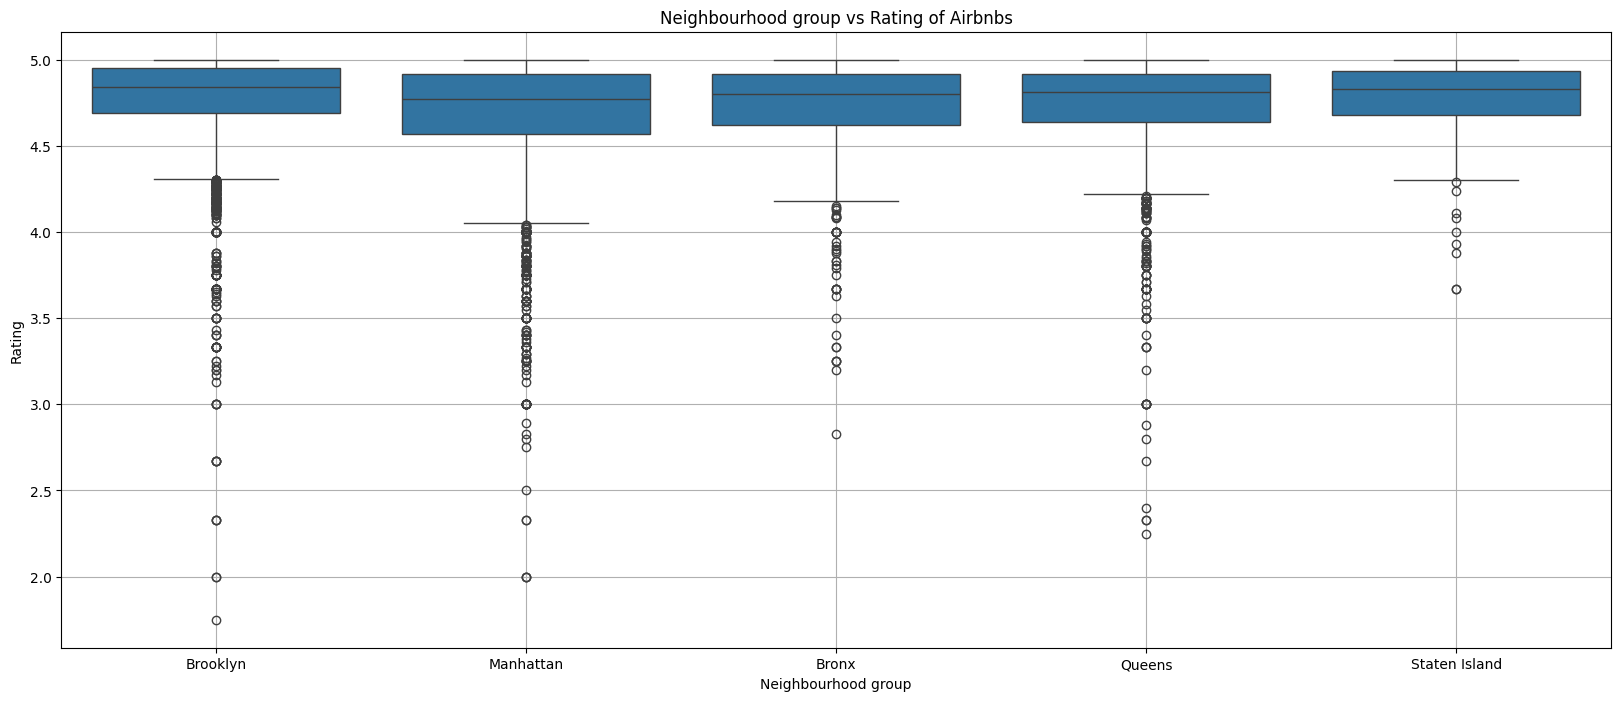

In [14]:
# Filter out unexpected rating values
filtered_df = df[~df['rating'].isin(['No rating', 'New '])]

# Convert rating column to float (assuming it's stored as strings)
filtered_df.loc[:, 'rating'] = filtered_df['rating'].astype(float)

# Box plot of Neighbourhood group vs Rating
plt.figure(figsize=(20, 8))
sns.boxplot(data=filtered_df, x='neighbourhood_group', y='rating')
plt.title('Neighbourhood group vs Rating of Airbnbs')
plt.xlabel('Neighbourhood group')
plt.ylabel('Rating')  
plt.grid(True)
plt.show()
